In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Adsorption_Data.csv')
data

,C(x1),H(x2),N(x3),Si(x4),BET(x5),Adorption Capacity(output)
0,12.8,1.16,0.38,7.51,8.75,0.144
1,6.5,0.57,0.04,3.34,3.69,0.334
2,8.7,0.54,0.21,40.98,33.37,0.452
3,3.5,0.35,0.12,22.05,7.55,0.333
4,7.2,0.71,0.03,3.16,1.97,0.383
5,9.7,0.98,0.34,58.88,58.00,0.366
6,10.9,0.74,0.32,6.07,46.00,0.544
7,2.5,0.32,0.17,28.01,22.00,0.436
8,58.6,2.10,0.38,0.38,38.03,1.160
9,69.1,1.77,0.86,0.53,111.00,2.400


In [3]:
# Step 1: Data preprocessing

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# load the dataset

# split the dataset into features and output
X = data.drop('Adorption Capacity(output)', axis=1)
y = data['Adorption Capacity(output)']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale the features using standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 2: Building the model

from keras.models import Sequential
from keras.layers import Dense

# define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Step 3: Training the model

history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Step 4: Evaluating the model

score = model.evaluate(X_test, y_test, batch_size=32)
print("Test loss:", score[0])
print("Test MAE:", score[1])


Epoch 1/100


C:\Users\Malik Zadah Irfan\miniconda3\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


1/1 [==============================] - 1s 951ms/step - loss: 23.9573 - mae: 2.5342 - val_loss: 199.5142 - val_mae: 7.7904
Epoch 2/100
1/1 [==============================] - 0s 40ms/step - loss: 23.5626 - mae: 2.4758 - val_loss: 197.7372 - val_mae: 7.7173
Epoch 3/100
1/1 [==============================] - 0s 40ms/step - loss: 23.1824 - mae: 2.4212 - val_loss: 196.2459 - val_mae: 7.6500
Epoch 4/100
1/1 [==============================] - 0s 43ms/step - loss: 22.8168 - mae: 2.3677 - val_loss: 194.8471 - val_mae: 7.5849
Epoch 5/100
1/1 [==============================] - 0s 40ms/step - loss: 22.4651 - mae: 2.3199 - val_loss: 193.4772 - val_mae: 7.5198
Epoch 6/100
1/1 [==============================] - 0s 52ms/step - loss: 22.1251 - mae: 2.2731 - val_loss: 192.1145 - val_mae: 7.4553
Epoch 7/100
1/1 [==============================] - 0s 35ms/step - loss: 21.8107 - mae: 2.2293 - val_loss: 190.8087 - val_mae: 7.3926
Epoch 8/100
1/1 [==============================] - 0s 40ms/step - loss: 21.5009 

1/1 [==============================] - 0s 32ms/step - loss: 9.2337 - mae: 1.4178 - val_loss: 113.7012 - val_mae: 5.2043
Epoch 63/100
1/1 [==============================] - 0s 32ms/step - loss: 9.0437 - mae: 1.4110 - val_loss: 112.2174 - val_mae: 5.1916
Epoch 64/100
1/1 [==============================] - 0s 48ms/step - loss: 8.8582 - mae: 1.4048 - val_loss: 110.7366 - val_mae: 5.1782
Epoch 65/100
1/1 [==============================] - 0s 40ms/step - loss: 8.6749 - mae: 1.3982 - val_loss: 109.2681 - val_mae: 5.1647
Epoch 66/100
1/1 [==============================] - 0s 32ms/step - loss: 8.4959 - mae: 1.3914 - val_loss: 107.7966 - val_mae: 5.1510
Epoch 67/100
1/1 [==============================] - 0s 32ms/step - loss: 8.3254 - mae: 1.3844 - val_loss: 106.2913 - val_mae: 5.1368
Epoch 68/100
1/1 [==============================] - 0s 32ms/step - loss: 8.1575 - mae: 1.3772 - val_loss: 104.7788 - val_mae: 5.1221
Epoch 69/100
1/1 [==============================] - 0s 40ms/step - loss: 7.9915 - 

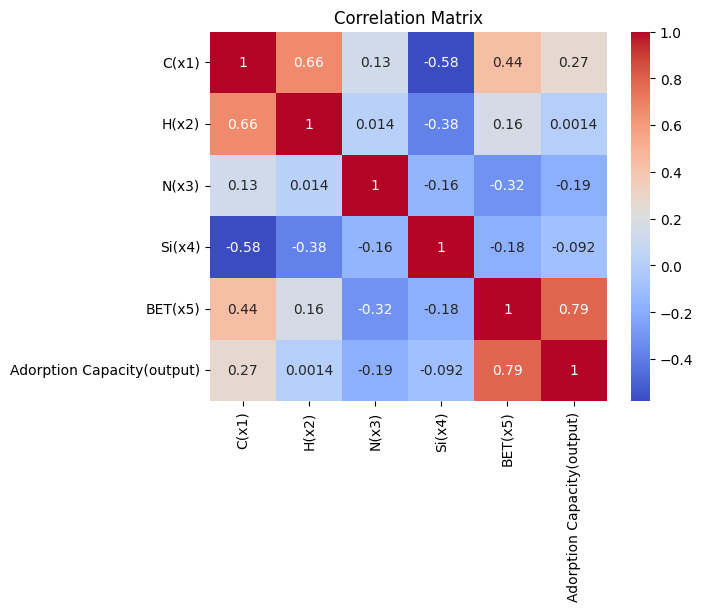

In [4]:
# import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# load the dataset

# calculate the correlation matrix
corr = data.corr()

# plot the correlation heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


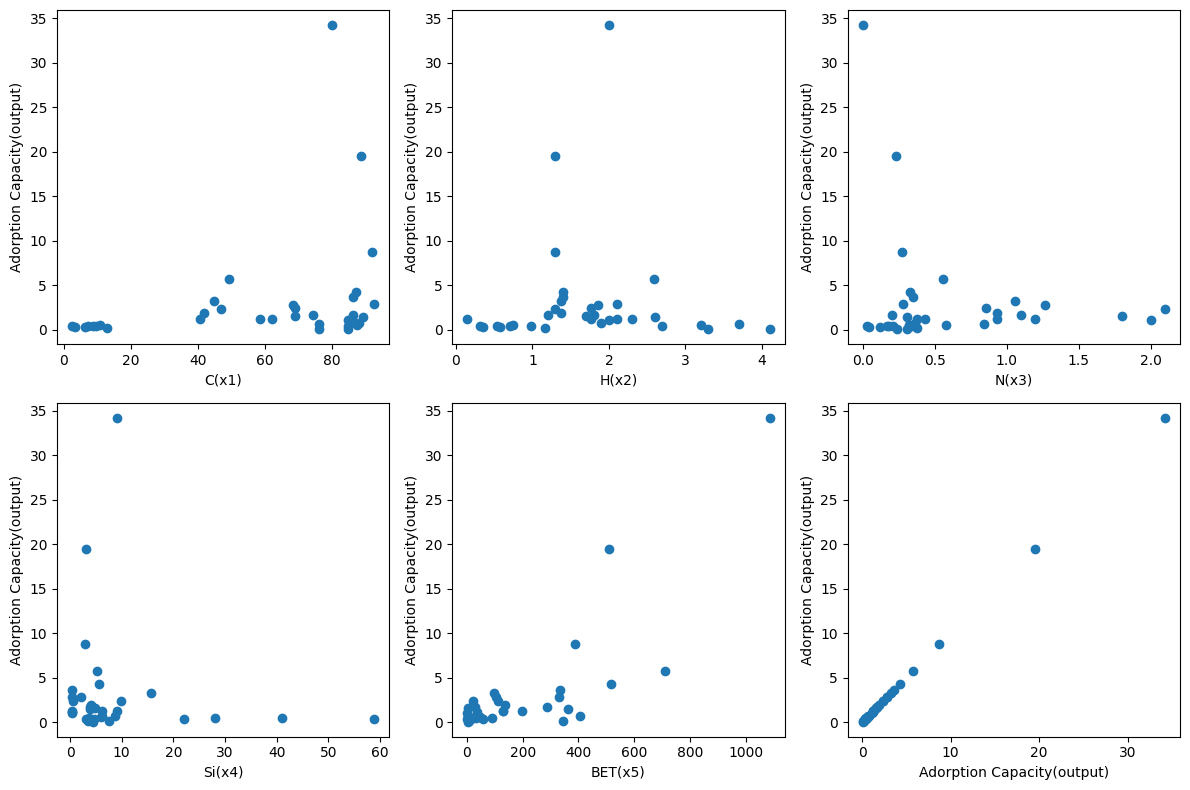

In [5]:
# plot scatter plots between each feature and output
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,8))

axes[0,0].scatter(data['C(x1)'], data['Adorption Capacity(output)'])
axes[0,0].set_xlabel('C(x1)')
axes[0,0].set_ylabel('Adorption Capacity(output)')

axes[0,1].scatter(data['H(x2)'], data['Adorption Capacity(output)'])
axes[0,1].set_xlabel('H(x2)')
axes[0,1].set_ylabel('Adorption Capacity(output)')

axes[0,2].scatter(data['N(x3)'], data['Adorption Capacity(output)'])
axes[0,2].set_xlabel('N(x3)')
axes[0,2].set_ylabel('Adorption Capacity(output)')

axes[1,0].scatter(data['Si(x4)'], data['Adorption Capacity(output)'])
axes[1,0].set_xlabel('Si(x4)')
axes[1,0].set_ylabel('Adorption Capacity(output)')

axes[1,1].scatter(data['BET(x5)'], data['Adorption Capacity(output)'])
axes[1,1].set_xlabel('BET(x5)')
axes[1,1].set_ylabel('Adorption Capacity(output)')

axes[1,2].scatter(data['Adorption Capacity(output)'], data['Adorption Capacity(output)'])
axes[1,2].set_xlabel('Adorption Capacity(output)')
axes[1,2].set_ylabel('Adorption Capacity(output)')

plt.tight_layout()
plt.show()


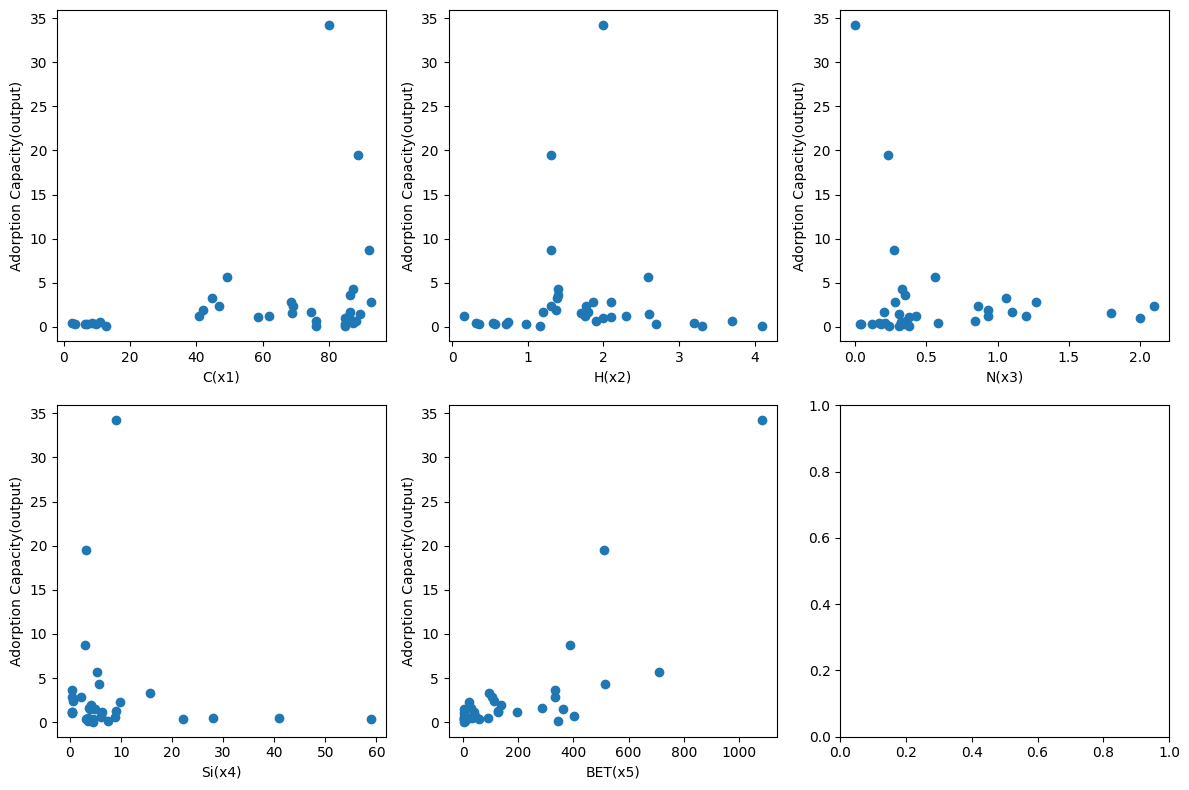

In [6]:
import matplotlib.pyplot as plt

# create scatter plots of each feature against the output
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.flatten()
for i in range(X.shape[1]):
    axs[i].scatter(X.iloc[:, i], y)
    axs[i].set_xlabel(X.columns[i])
    axs[i].set_ylabel('Adorption Capacity(output)')
plt.tight_layout()
plt.show()


C:\Users\Malik Zadah Irfan\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Malik Zadah Irfan\AppData\Local\Temp\ipykernel_9180\1038196463.py:27: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  axs[i].plot(x_range, model.predict(np.column_stack((np.full(100, x) if i == j else x_range for j, x in enumerate(X.mean(axis=0))))), color='red')
C:\Users\Malik Zadah Irfan\AppData\Local\Temp\ipykernel_9180\1038196463.py:27: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  axs[i].plot(x_rang

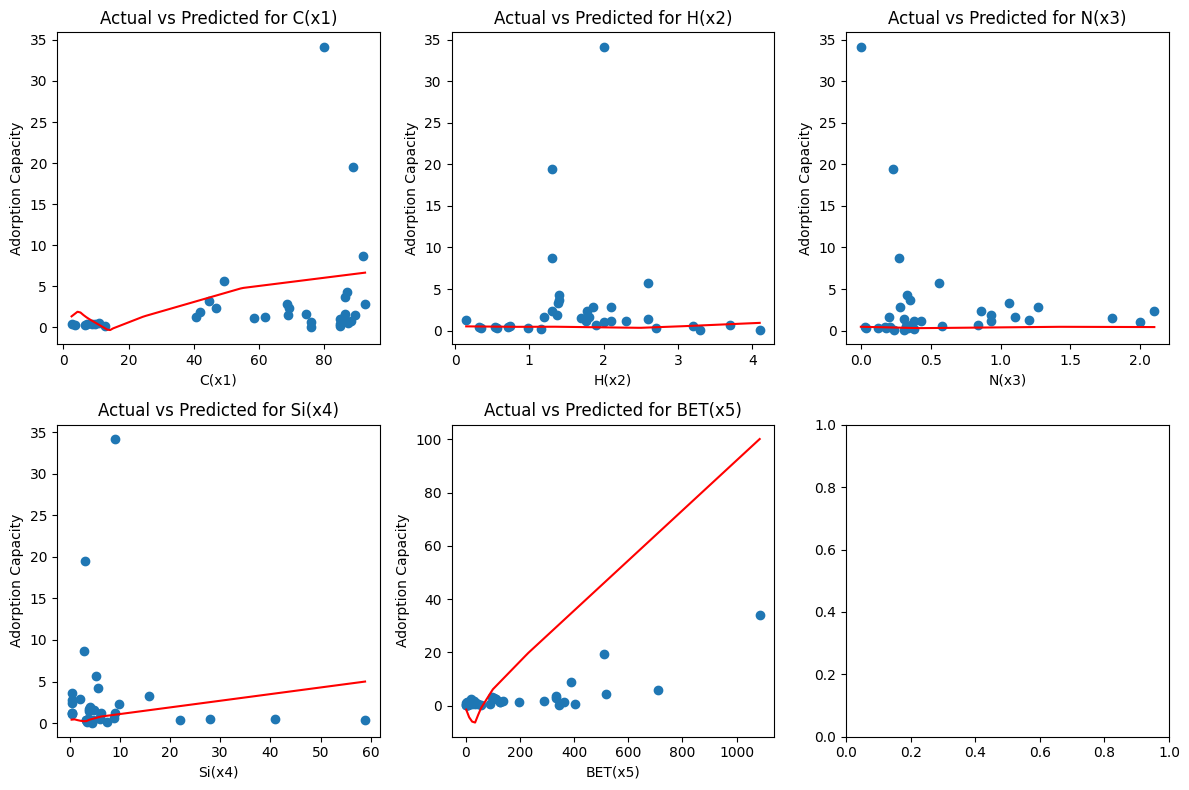

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

# Load the dataset from CSV file

# Split the data into X (features) and y (output)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Train a neural network on the data
model = MLPRegressor(hidden_layer_sizes=(16, 8), activation='relu', solver='adam', max_iter=1000)
model.fit(X, y)

# Create scatter plots of each feature against the output
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
axs = axs.flatten()
for i in range(X.shape[1]):
    axs[i].scatter(X[:, i], y)
    axs[i].set_xlabel(data.columns[i])
    axs[i].set_ylabel('Adorption Capacity')
    axs[i].set_title('Actual vs Predicted for ' + data.columns[i])
    # Predict the output using the trained model and plot the predicted values
    x_range = np.linspace(min(X[:, i]), max(X[:, i]), 100)
    y_pred = model.predict(X)
    axs[i].plot(x_range, model.predict(np.column_stack((np.full(100, x) if i == j else x_range for j, x in enumerate(X.mean(axis=0))))), color='red')
plt.tight_layout()
plt.show()
